In [1]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec

from utils import *
from utilsPCA import *
from plotting import *
from isolation import *

import matplotlib

In [2]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rc('legend', fontsize=16) 
matplotlib.rc('axes', labelsize=16, titlesize=20)

#plt.style.use(hep.style.CMS)
%matplotlib inline

### load data

In [3]:
bkg_noMTD_B = np.loadtxt("bkg_ele_iso_noMTD_B_0PU.txt")
bkg_noMTD_E = np.loadtxt("bkg_ele_iso_noMTD_E_0PU.txt")
bkg_MTD_B = np.loadtxt("bkg_ele_iso_MTD_B_0PU.txt")
bkg_MTD_E = np.loadtxt("bkg_ele_iso_MTD_E_0PU.txt")
bkg_sim_MTD_B = np.loadtxt("bkg_ele_sim_iso_MTD_B_0PU.txt")
bkg_sim_MTD_E = np.loadtxt("bkg_ele_sim_iso_MTD_E_0PU.txt")
bkg_gen_MTD_B = np.loadtxt("bkg_ele_gen_iso_MTD_B_0PU.txt")
bkg_gen_MTD_E = np.loadtxt("bkg_ele_gen_iso_MTD_E_0PU.txt")

sig_noMTD_B = np.loadtxt("sig_ele_iso_noMTD_B_0PU.txt")
sig_noMTD_E = np.loadtxt("sig_ele_iso_noMTD_E_0PU.txt")
sig_MTD_B = np.loadtxt("sig_ele_iso_MTD_B_0PU.txt")
sig_MTD_E = np.loadtxt("sig_ele_iso_MTD_E_0PU.txt")
sig_sim_MTD_B = np.loadtxt("sig_ele_sim_iso_MTD_B_0PU.txt")
sig_sim_MTD_E = np.loadtxt("sig_ele_sim_iso_MTD_E_0PU.txt")
sig_gen_MTD_B = np.loadtxt("sig_ele_gen_iso_MTD_B_0PU.txt")
sig_gen_MTD_E = np.loadtxt("sig_ele_gen_iso_MTD_E_0PU.txt")

In [4]:
bkg_noMTD_B_200PU = np.loadtxt("bkg_ele_iso_noMTD_B.txt")
bkg_noMTD_E_200PU = np.loadtxt("bkg_ele_iso_noMTD_E.txt")
bkg_MTD_B_200PU = np.loadtxt("bkg_ele_iso_MTD_B.txt")
bkg_MTD_E_200PU = np.loadtxt("bkg_ele_iso_MTD_E.txt")
bkg_sim_MTD_B_200PU = np.loadtxt("bkg_ele_sim_iso_MTD_B.txt")
bkg_sim_MTD_E_200PU = np.loadtxt("bkg_ele_sim_iso_MTD_E.txt")
bkg_gen_MTD_B_200PU = np.loadtxt("bkg_ele_gen_iso_MTD_B.txt")
bkg_gen_MTD_E_200PU = np.loadtxt("bkg_ele_gen_iso_MTD_E.txt")

sig_noMTD_B_200PU = np.loadtxt("sig_ele_iso_noMTD_B.txt")
sig_noMTD_E_200PU = np.loadtxt("sig_ele_iso_noMTD_E.txt")
sig_MTD_B_200PU = np.loadtxt("sig_ele_iso_MTD_B.txt")
sig_MTD_E_200PU = np.loadtxt("sig_ele_iso_MTD_E.txt")
sig_sim_MTD_B_200PU = np.loadtxt("sig_ele_sim_iso_MTD_B.txt")
sig_sim_MTD_E_200PU = np.loadtxt("sig_ele_sim_iso_MTD_E.txt")
sig_gen_MTD_B_200PU = np.loadtxt("sig_ele_gen_iso_MTD_B.txt")
sig_gen_MTD_E_200PU = np.loadtxt("sig_ele_gen_iso_MTD_E.txt")

In [5]:
bkgPV_noMTD_B_200PU = np.loadtxt("bkgPV_ele_iso_noMTD_B.txt")
bkgPV_noMTD_E_200PU = np.loadtxt("bkgPV_ele_iso_noMTD_E.txt")
bkgPV_MTD_B_200PU = np.loadtxt("bkgPV_ele_iso_MTD_B.txt")
bkgPV_MTD_E_200PU = np.loadtxt("bkgPV_ele_iso_MTD_E.txt")
bkgPV_sim_MTD_B_200PU = np.loadtxt("bkgPV_ele_sim_iso_MTD_B.txt")
bkgPV_sim_MTD_E_200PU = np.loadtxt("bkgPV_ele_sim_iso_MTD_E.txt")
bkgPV_gen_MTD_B_200PU = np.loadtxt("bkgPV_ele_gen_iso_MTD_B.txt")
bkgPV_gen_MTD_E_200PU = np.loadtxt("bkgPV_ele_gen_iso_MTD_E.txt")

sigPV_noMTD_B_200PU = np.loadtxt("sigPV_ele_iso_noMTD_B.txt")
sigPV_noMTD_E_200PU = np.loadtxt("sigPV_ele_iso_noMTD_E.txt")
sigPV_MTD_B_200PU = np.loadtxt("sigPV_ele_iso_MTD_B.txt")
sigPV_MTD_E_200PU = np.loadtxt("sigPV_ele_iso_MTD_E.txt")
sigPV_sim_MTD_B_200PU = np.loadtxt("sigPV_ele_sim_iso_MTD_B.txt")
sigPV_sim_MTD_E_200PU = np.loadtxt("sigPV_ele_sim_iso_MTD_E.txt")
sigPV_gen_MTD_B_200PU = np.loadtxt("sigPV_ele_gen_iso_MTD_B.txt")
sigPV_gen_MTD_E_200PU = np.loadtxt("sigPV_ele_gen_iso_MTD_E.txt")

In [6]:
miniso= 0.01
maxiso = 0.3
iso_step = np.linspace(miniso, maxiso, 100)

iso_bkg_noMTD_B, iso_bkg_MTD_B, iso_bkg_sim_MTD_B, iso_bkg_gen_MTD_B = iso_for_plot(bkg_noMTD_B, bkg_MTD_B, bkg_sim_MTD_B, bkg_gen_MTD_B, miniso, maxiso)
iso_bkg_noMTD_E, iso_bkg_MTD_E, iso_bkg_sim_MTD_E, iso_bkg_gen_MTD_E = iso_for_plot(bkg_noMTD_E, bkg_MTD_E, bkg_sim_MTD_E, bkg_gen_MTD_E, miniso, maxiso)
iso_sig_noMTD_B, iso_sig_MTD_B, iso_sig_sim_MTD_B, iso_sig_gen_MTD_B = iso_for_plot(sig_noMTD_B, sig_MTD_B, sig_sim_MTD_B, sig_gen_MTD_B, miniso, maxiso)
iso_sig_noMTD_E, iso_sig_MTD_E, iso_sig_sim_MTD_E, iso_sig_gen_MTD_E = iso_for_plot(sig_noMTD_E, sig_MTD_E, sig_sim_MTD_E, sig_gen_MTD_E, miniso, maxiso)

iso_bkg_noMTD_B_200PU, iso_bkg_MTD_B_200PU, iso_bkg_sim_MTD_B_200PU, iso_bkg_gen_MTD_B_200PU = iso_for_plot(bkg_noMTD_B_200PU, bkg_MTD_B_200PU, bkg_sim_MTD_B_200PU, bkg_gen_MTD_B_200PU, miniso, maxiso)
iso_bkg_noMTD_E_200PU, iso_bkg_MTD_E_200PU, iso_bkg_sim_MTD_E_200PU, iso_bkg_gen_MTD_E_200PU = iso_for_plot(bkg_noMTD_E_200PU, bkg_MTD_E_200PU, bkg_sim_MTD_E_200PU, bkg_gen_MTD_E_200PU, miniso, maxiso)
iso_sig_noMTD_B_200PU, iso_sig_MTD_B_200PU, iso_sig_sim_MTD_B_200PU, iso_sig_gen_MTD_B_200PU = iso_for_plot(sig_noMTD_B_200PU, sig_MTD_B_200PU, sig_sim_MTD_B_200PU, sig_gen_MTD_B_200PU, miniso, maxiso)
iso_sig_noMTD_E_200PU, iso_sig_MTD_E_200PU, iso_sig_sim_MTD_E_200PU, iso_sig_gen_MTD_E_200PU = iso_for_plot(sig_noMTD_E_200PU, sig_MTD_E_200PU, sig_sim_MTD_E_200PU, sig_gen_MTD_E_200PU, miniso, maxiso)

isoPV_bkg_noMTD_B_200PU, isoPV_bkg_MTD_B_200PU, isoPV_bkg_sim_MTD_B_200PU, isoPV_bkg_gen_MTD_B_200PU = iso_for_plot(bkgPV_noMTD_B_200PU, bkgPV_MTD_B_200PU, bkgPV_sim_MTD_B_200PU, 
                                                                                                                    bkgPV_gen_MTD_B_200PU, miniso, maxiso)
isoPV_bkg_noMTD_E_200PU, isoPV_bkg_MTD_E_200PU, isoPV_bkg_sim_MTD_E_200PU, isoPV_bkg_gen_MTD_E_200PU = iso_for_plot(bkgPV_noMTD_E_200PU, bkgPV_MTD_E_200PU, bkgPV_sim_MTD_E_200PU, 
                                                                                                                    bkgPV_gen_MTD_E_200PU, miniso, maxiso)
isoPV_sig_noMTD_B_200PU, isoPV_sig_MTD_B_200PU, isoPV_sig_sim_MTD_B_200PU, isoPV_sig_gen_MTD_B_200PU = iso_for_plot(sigPV_noMTD_B_200PU, sigPV_MTD_B_200PU, sigPV_sim_MTD_B_200PU, 
                                                                                                                    sigPV_gen_MTD_B_200PU, miniso, maxiso)
isoPV_sig_noMTD_E_200PU, isoPV_sig_MTD_E_200PU, isoPV_sig_sim_MTD_E_200PU, isoPV_sig_gen_MTD_E_200PU = iso_for_plot(sigPV_noMTD_E_200PU, sigPV_MTD_E_200PU, sigPV_sim_MTD_E_200PU, 
                                                                                                                    sigPV_gen_MTD_E_200PU, miniso, maxiso)

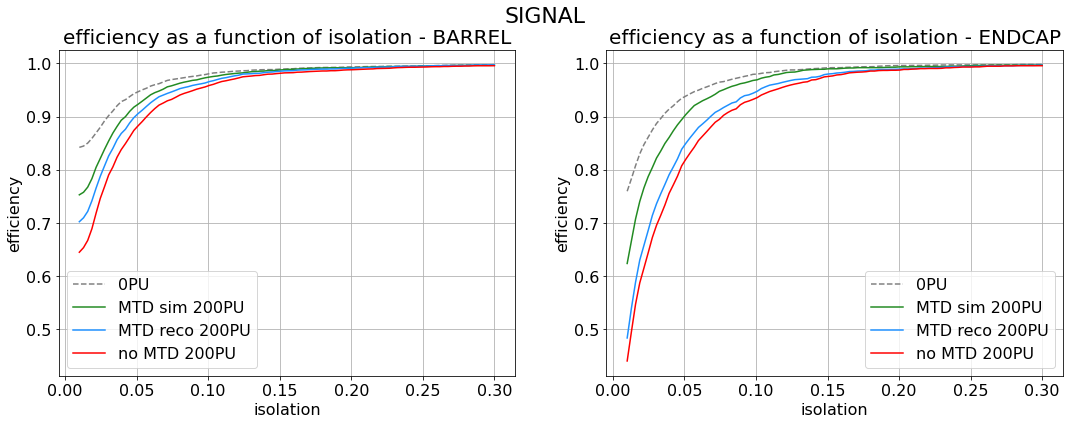

In [6]:
plt.figure(figsize=(18,6))

plt.suptitle("SIGNAL", fontsize=22)

ax = plt.subplot(121)
plt.title("efficiency as a function of isolation - BARREL")
plt.plot(iso_step, iso_sig_gen_MTD_B, color="grey", label="0PU", linestyle="dashed")
#plt.plot(iso_step, iso_sig_sim_MTD_B, color="forestgreen", label="MTD sim 0PU", linestyle="dashed")
#plt.plot(iso_step, iso_sig_MTD_B, color="dodgerblue", label="MTD reco 0PU", linestyle="dashed")
#plt.plot(iso_step, iso_sig_noMTD_B, color="red", label="no MTD 0PU", linestyle="dashed")

#plt.plot(iso_step, iso_sig_gen_MTD_B_200PU, color="grey", label="gen info 200PU")
plt.plot(iso_step, iso_sig_sim_MTD_B_200PU, color="forestgreen", label="MTD sim 200PU")
plt.plot(iso_step, iso_sig_MTD_B_200PU, color="dodgerblue", label="MTD reco 200PU")
plt.plot(iso_step, iso_sig_noMTD_B_200PU, color="red", label="no MTD 200PU")

plt.xlabel("isolation")
plt.ylabel("efficiency")
plt.grid()
plt.legend()

plt.subplot(122, sharey=ax)
plt.title("efficiency as a function of isolation - ENDCAP")
plt.plot(iso_step, iso_sig_gen_MTD_E, color="grey", label="0PU", linestyle="dashed")
#plt.plot(iso_step, iso_sig_sim_MTD_E, color="forestgreen", label="MTD sim 0PU", linestyle="dashed")
#plt.plot(iso_step, iso_sig_MTD_E, color="dodgerblue", label="MTD reco 0PU", linestyle="dashed")
#plt.plot(iso_step, iso_sig_noMTD_E, color="red", label="no MTD 0PU", linestyle="dashed")

#plt.plot(iso_step, iso_sig_gen_MTD_E_200PU, color="grey", label="gen info 200PU")
plt.plot(iso_step, iso_sig_sim_MTD_E_200PU, color="forestgreen", label="MTD sim 200PU")
plt.plot(iso_step, iso_sig_MTD_E_200PU, color="dodgerblue", label="MTD reco 200PU")
plt.plot(iso_step, iso_sig_noMTD_E_200PU, color="red", label="no MTD 200PU")

plt.xlabel("isolation")
plt.ylabel("efficiency")
plt.grid()
plt.legend()

plt.show()

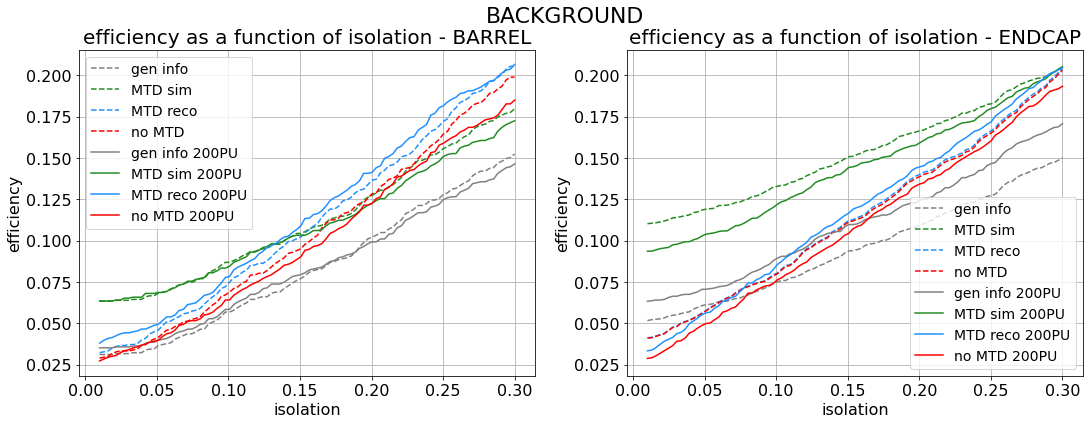

In [8]:
plt.figure(figsize=(18,6))

plt.suptitle("BACKGROUND", fontsize=22)

ax = plt.subplot(121)
plt.title("efficiency as a function of isolation - BARREL")
plt.plot(iso_step, iso_bkg_gen_MTD_B, color="grey", label="gen info", linestyle="dashed")
plt.plot(iso_step, iso_bkg_sim_MTD_B, color="forestgreen", label="MTD sim", linestyle="dashed")
plt.plot(iso_step, iso_bkg_MTD_B, color="dodgerblue", label="MTD reco", linestyle="dashed")
plt.plot(iso_step, iso_bkg_noMTD_B, color="red", label="no MTD", linestyle="dashed")

plt.plot(iso_step, iso_bkg_gen_MTD_B_200PU, color="grey", label="gen info 200PU")
plt.plot(iso_step, iso_bkg_sim_MTD_B_200PU, color="forestgreen", label="MTD sim 200PU")
plt.plot(iso_step, iso_bkg_MTD_B_200PU, color="dodgerblue", label="MTD reco 200PU")
plt.plot(iso_step, iso_bkg_noMTD_B_200PU, color="red", label="no MTD 200PU")

plt.xlabel("isolation")
plt.ylabel("efficiency")
#plt.xlim(0,0.3)
plt.grid()
plt.legend(fontsize=14)

plt.subplot(122, sharey=ax)
plt.title("efficiency as a function of isolation - ENDCAP")
plt.plot(iso_step, iso_bkg_gen_MTD_E, color="grey", label="gen info", linestyle="dashed")
plt.plot(iso_step, iso_bkg_sim_MTD_E, color="forestgreen", label="MTD sim", linestyle="dashed")
plt.plot(iso_step, iso_bkg_MTD_E, color="dodgerblue", label="MTD reco", linestyle="dashed")
plt.plot(iso_step, iso_bkg_noMTD_E, color="red", label="no MTD", linestyle="dashed")

plt.plot(iso_step, iso_bkg_gen_MTD_E_200PU, color="grey", label="gen info 200PU")
plt.plot(iso_step, iso_bkg_sim_MTD_E_200PU, color="forestgreen", label="MTD sim 200PU")
plt.plot(iso_step, iso_bkg_MTD_E_200PU, color="dodgerblue", label="MTD reco 200PU")
plt.plot(iso_step, iso_bkg_noMTD_E_200PU, color="red", label="no MTD 200PU")

plt.xlabel("isolation")
plt.ylabel("efficiency")
#plt.xlim(0,0.3)
plt.grid()
plt.legend(fontsize=14)

plt.show()

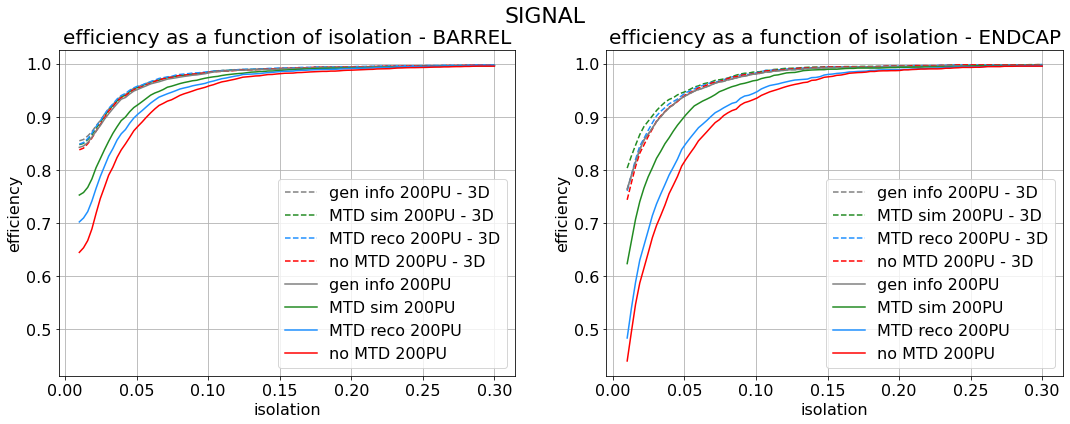

In [14]:
plt.figure(figsize=(18,6))

plt.suptitle("SIGNAL", fontsize=22)

ax = plt.subplot(121)
plt.title("efficiency as a function of isolation - BARREL")
plt.plot(iso_step, isoPV_sig_gen_MTD_B_200PU, color="grey", label="gen info 200PU - 3D", linestyle="dashed")
plt.plot(iso_step, isoPV_sig_sim_MTD_B_200PU, color="forestgreen", label="MTD sim 200PU - 3D", linestyle="dashed")
plt.plot(iso_step, isoPV_sig_MTD_B_200PU, color="dodgerblue", label="MTD reco 200PU - 3D", linestyle="dashed")
plt.plot(iso_step, isoPV_sig_noMTD_B_200PU, color="red", label="no MTD 200PU - 3D", linestyle="dashed")

plt.plot(iso_step, iso_sig_gen_MTD_B_200PU, color="grey", label="gen info 200PU")
plt.plot(iso_step, iso_sig_sim_MTD_B_200PU, color="forestgreen", label="MTD sim 200PU")
plt.plot(iso_step, iso_sig_MTD_B_200PU, color="dodgerblue", label="MTD reco 200PU")
plt.plot(iso_step, iso_sig_noMTD_B_200PU, color="red", label="no MTD 200PU")

plt.xlabel("isolation")
plt.ylabel("efficiency")
plt.grid()
plt.legend()

plt.subplot(122, sharey=ax)
plt.title("efficiency as a function of isolation - ENDCAP")
plt.plot(iso_step, iso_sig_gen_MTD_E_200PU, color="grey", label="gen info 200PU - 3D", linestyle="dashed")
plt.plot(iso_step, isoPV_sig_sim_MTD_E_200PU, color="forestgreen", label="MTD sim 200PU - 3D", linestyle="dashed")
plt.plot(iso_step, isoPV_sig_MTD_E_200PU, color="dodgerblue", label="MTD reco 200PU - 3D", linestyle="dashed")
plt.plot(iso_step, isoPV_sig_noMTD_E_200PU, color="red", label="no MTD 200PU - 3D", linestyle="dashed")

plt.plot(iso_step, iso_sig_gen_MTD_E_200PU, color="grey", label="gen info 200PU")
plt.plot(iso_step, iso_sig_sim_MTD_E_200PU, color="forestgreen", label="MTD sim 200PU")
plt.plot(iso_step, iso_sig_MTD_E_200PU, color="dodgerblue", label="MTD reco 200PU")
plt.plot(iso_step, iso_sig_noMTD_E_200PU, color="red", label="no MTD 200PU")

plt.xlabel("isolation")
plt.ylabel("efficiency")
plt.grid()
plt.legend()

plt.show()

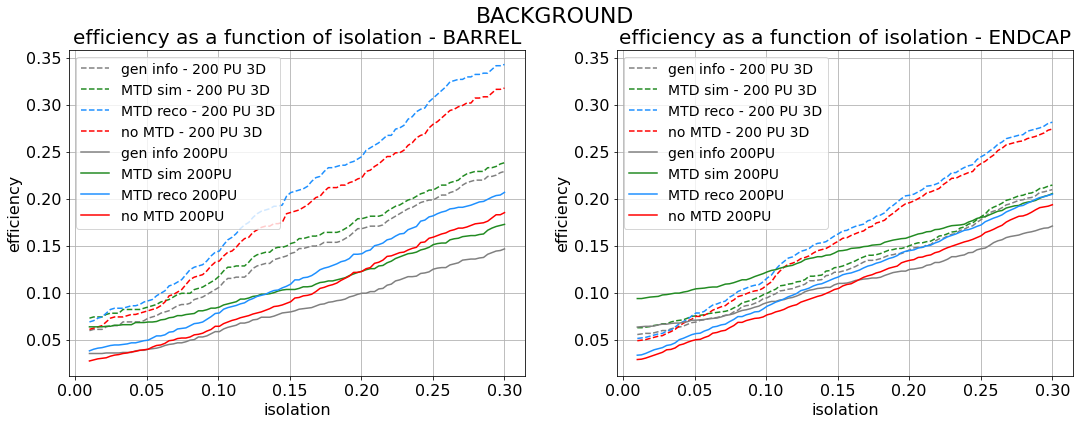

In [15]:
plt.figure(figsize=(18,6))

plt.suptitle("BACKGROUND", fontsize=22)

ax = plt.subplot(121)
plt.title("efficiency as a function of isolation - BARREL")
plt.plot(iso_step, isoPV_bkg_gen_MTD_B_200PU, color="grey", label="gen info - 200 PU 3D", linestyle="dashed")
plt.plot(iso_step, isoPV_bkg_sim_MTD_B_200PU, color="forestgreen", label="MTD sim - 200 PU 3D", linestyle="dashed")
plt.plot(iso_step, isoPV_bkg_MTD_B_200PU, color="dodgerblue", label="MTD reco - 200 PU 3D", linestyle="dashed")
plt.plot(iso_step, isoPV_bkg_noMTD_B_200PU, color="red", label="no MTD - 200 PU 3D", linestyle="dashed")

plt.plot(iso_step, iso_bkg_gen_MTD_B_200PU, color="grey", label="gen info 200PU")
plt.plot(iso_step, iso_bkg_sim_MTD_B_200PU, color="forestgreen", label="MTD sim 200PU")
plt.plot(iso_step, iso_bkg_MTD_B_200PU, color="dodgerblue", label="MTD reco 200PU")
plt.plot(iso_step, iso_bkg_noMTD_B_200PU, color="red", label="no MTD 200PU")

plt.xlabel("isolation")
plt.ylabel("efficiency")
#plt.xlim(0,0.3)
plt.grid()
plt.legend(fontsize=14)

plt.subplot(122, sharey=ax)
plt.title("efficiency as a function of isolation - ENDCAP")
plt.plot(iso_step, isoPV_bkg_gen_MTD_E_200PU, color="grey", label="gen info - 200 PU 3D", linestyle="dashed")
plt.plot(iso_step, isoPV_bkg_sim_MTD_E_200PU, color="forestgreen", label="MTD sim - 200 PU 3D", linestyle="dashed")
plt.plot(iso_step, isoPV_bkg_MTD_E_200PU, color="dodgerblue", label="MTD reco - 200 PU 3D", linestyle="dashed")
plt.plot(iso_step, isoPV_bkg_noMTD_E_200PU, color="red", label="no MTD - 200 PU 3D", linestyle="dashed")

plt.plot(iso_step, iso_bkg_gen_MTD_E_200PU, color="grey", label="gen info 200PU")
plt.plot(iso_step, iso_bkg_sim_MTD_E_200PU, color="forestgreen", label="MTD sim 200PU")
plt.plot(iso_step, iso_bkg_MTD_E_200PU, color="dodgerblue", label="MTD reco 200PU")
plt.plot(iso_step, iso_bkg_noMTD_E_200PU, color="red", label="no MTD 200PU")

plt.xlabel("isolation")
plt.ylabel("efficiency")
#plt.xlim(0,0.3)
plt.grid()
plt.legend(fontsize=14)

plt.show()

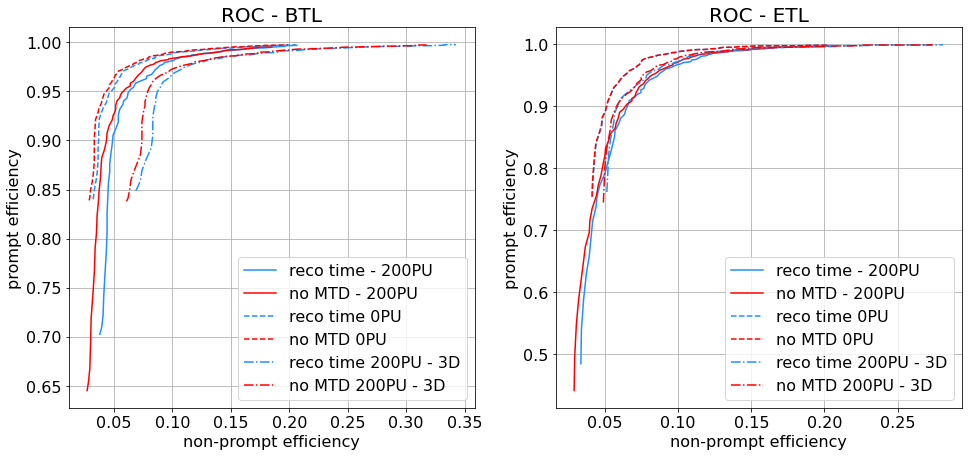

In [12]:
plt.figure(figsize=(16,7))
plt.subplot(121)
plt.plot(iso_bkg_MTD_B_200PU,     iso_sig_MTD_B_200PU,     color="dodgerblue", label="reco time - 200PU")
plt.plot(iso_bkg_noMTD_B_200PU,   iso_sig_noMTD_B_200PU,   color="red",        label="no MTD - 200PU")
# plt.plot(isoPV_bkg_noMTD_B_200PU,   isoPV_sig_noMTD_B_200PU,   color="green",        label="no MTD - PV - 200PU")
plt.plot(iso_bkg_MTD_B,     iso_sig_MTD_B,     color="dodgerblue",  label="reco time 0PU", linestyle="dashed")
plt.plot(iso_bkg_noMTD_B,   iso_sig_noMTD_B,   color="red",         label="no MTD 0PU", linestyle="dashed")
plt.plot(isoPV_bkg_MTD_B_200PU,     isoPV_sig_MTD_B_200PU,     color="dodgerblue",  label="reco time 200PU - 3D", linestyle="-.")
plt.plot(isoPV_bkg_noMTD_B_200PU,   isoPV_sig_noMTD_B_200PU,   color="red",         label="no MTD 200PU - 3D", linestyle="-.")
plt.title("ROC - BTL")
plt.xlabel("non-prompt efficiency")
plt.ylabel("prompt efficiency")
#plt.xlim(0,1)
#plt.ylim(0,1)
#plt.axis("equal")
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(iso_bkg_MTD_E_200PU,     iso_sig_MTD_E_200PU,     color="dodgerblue", label="reco time - 200PU")
plt.plot(iso_bkg_noMTD_E_200PU,   iso_sig_noMTD_E_200PU,   color="red",        label="no MTD - 200PU")
# plt.plot(isoPV_bkg_noMTD_E_200PU,   isoPV_sig_noMTD_E_200PU,   color="green",        label="no MTD - PV - 200PU")
plt.plot(iso_bkg_MTD_E,     iso_sig_MTD_E,     color="dodgerblue",  label="reco time 0PU", linestyle="dashed")
plt.plot(iso_bkg_noMTD_E,   iso_sig_noMTD_E,   color="red",         label="no MTD 0PU", linestyle="dashed")
plt.plot(isoPV_bkg_MTD_E_200PU,     isoPV_sig_MTD_E_200PU,     color="dodgerblue",  label="reco time 200PU - 3D", linestyle="-.")
plt.plot(isoPV_bkg_noMTD_E_200PU,   isoPV_sig_noMTD_E_200PU,   color="red",         label="no MTD 200PU - 3D", linestyle="-.")
plt.title("ROC - ETL")
plt.xlabel("non-prompt efficiency")
plt.ylabel("prompt efficiency")
#plt.xlim(0,1)
#plt.ylim(0,1)
#plt.axis("equal")
plt.legend()
plt.grid()
plt.show()

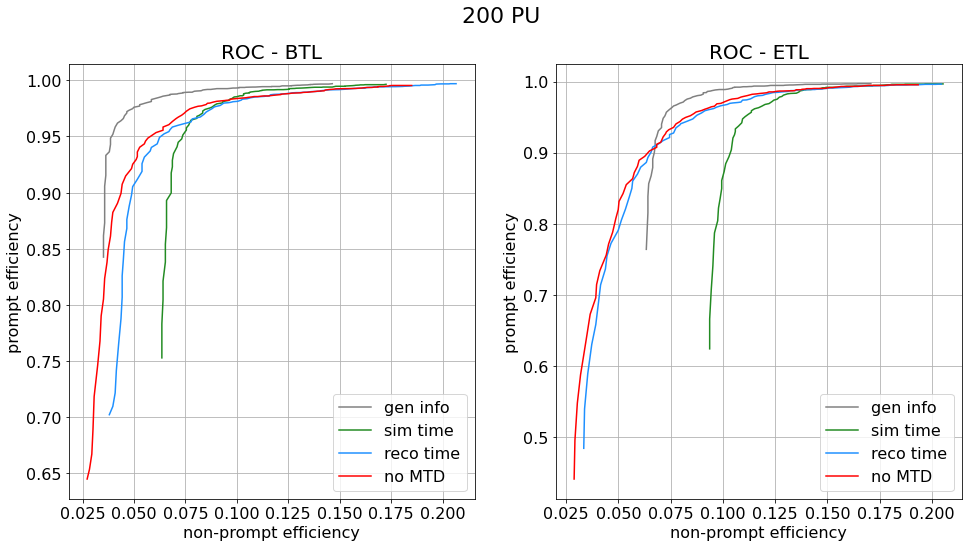

In [42]:
plt.figure(figsize=(16,8))

plt.suptitle("200 PU", fontsize=22)

plt.subplot(121)
plt.plot(iso_bkg_gen_MTD_B_200PU, iso_sig_gen_MTD_B_200PU, color="grey",        label="gen info")
plt.plot(iso_bkg_sim_MTD_B_200PU, iso_sig_sim_MTD_B_200PU, color="forestgreen", label="sim time")
plt.plot(iso_bkg_MTD_B_200PU,     iso_sig_MTD_B_200PU,     color="dodgerblue",  label="reco time")
plt.plot(iso_bkg_noMTD_B_200PU,   iso_sig_noMTD_B_200PU,   color="red",         label="no MTD")
plt.title("ROC - BTL")
plt.xlabel("non-prompt efficiency")
plt.ylabel("prompt efficiency")
#plt.xlim(0,1)
#plt.ylim(0,1)
#plt.axis("equal")
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(iso_bkg_gen_MTD_E_200PU, iso_sig_gen_MTD_E_200PU, color="grey",        label="gen info")
plt.plot(iso_bkg_sim_MTD_E_200PU, iso_sig_sim_MTD_E_200PU, color="forestgreen", label="sim time")
plt.plot(iso_bkg_MTD_E_200PU,     iso_sig_MTD_E_200PU,     color="dodgerblue",  label="reco time")
plt.plot(iso_bkg_noMTD_E_200PU,   iso_sig_noMTD_E_200PU,   color="red",         label="no MTD")
plt.title("ROC - ETL")
plt.xlabel("non-prompt efficiency")
plt.ylabel("prompt efficiency")
#plt.xlim(0,1)
#plt.ylim(0,1)
#plt.axis("equal")
plt.legend()
plt.grid()
plt.show()

# vertex

In [43]:
bkg_noMTD_B = np.loadtxt("vtx_bkg_ele_iso_noMTD_B.txt")
bkg_noMTD_E = np.loadtxt("vtx_bkg_ele_iso_noMTD_E.txt")
bkg_MTD_B = np.loadtxt("vtx_bkg_ele_iso_MTD_B.txt")
bkg_MTD_E = np.loadtxt("vtx_bkg_ele_iso_MTD_E.txt")
bkg_sim_MTD_B = np.loadtxt("vtx_bkg_ele_sim_iso_MTD_B.txt")
bkg_sim_MTD_E = np.loadtxt("vtx_bkg_ele_sim_iso_MTD_E.txt")
bkg_gen_MTD_B = np.loadtxt("vtx_bkg_ele_gen_iso_MTD_B.txt")
bkg_gen_MTD_E = np.loadtxt("vtx_bkg_ele_gen_iso_MTD_E.txt")

sig_noMTD_B = np.loadtxt("vtx_sig_ele_iso_noMTD_B.txt")
sig_noMTD_E = np.loadtxt("vtx_sig_ele_iso_noMTD_E.txt")
sig_MTD_B = np.loadtxt("vtx_sig_ele_iso_MTD_B.txt")
sig_MTD_E = np.loadtxt("vtx_sig_ele_iso_MTD_E.txt")
sig_sim_MTD_B = np.loadtxt("vtx_sig_ele_sim_iso_MTD_B.txt")
sig_sim_MTD_E = np.loadtxt("vtx_sig_ele_sim_iso_MTD_E.txt")
sig_gen_MTD_B = np.loadtxt("vtx_sig_ele_gen_iso_MTD_B.txt")
sig_gen_MTD_E = np.loadtxt("vtx_sig_ele_gen_iso_MTD_E.txt")

In [44]:
bkg_noMTD_B_200PU = np.loadtxt("vtx_bkg_ele_iso_noMTD_B_200PU.txt")
bkg_noMTD_E_200PU = np.loadtxt("vtx_bkg_ele_iso_noMTD_E_200PU.txt")
bkg_MTD_B_200PU = np.loadtxt("vtx_bkg_ele_iso_MTD_B_200PU.txt")
bkg_MTD_E_200PU = np.loadtxt("vtx_bkg_ele_iso_MTD_E_200PU.txt")
bkg_sim_MTD_B_200PU = np.loadtxt("vtx_bkg_ele_sim_iso_MTD_B_200PU.txt")
bkg_sim_MTD_E_200PU = np.loadtxt("vtx_bkg_ele_sim_iso_MTD_E_200PU.txt")
bkg_gen_MTD_B_200PU = np.loadtxt("vtx_bkg_ele_gen_iso_MTD_B_200PU.txt")
bkg_gen_MTD_E_200PU = np.loadtxt("vtx_bkg_ele_gen_iso_MTD_E_200PU.txt")

sig_noMTD_B_200PU = np.loadtxt("vtx_sig_ele_iso_noMTD_B_200PU.txt")
sig_noMTD_E_200PU = np.loadtxt("vtx_sig_ele_iso_noMTD_E_200PU.txt")
sig_MTD_B_200PU = np.loadtxt("vtx_sig_ele_iso_MTD_B_200PU.txt")
sig_MTD_E_200PU = np.loadtxt("vtx_sig_ele_iso_MTD_E_200PU.txt")
sig_sim_MTD_B_200PU = np.loadtxt("vtx_sig_ele_sim_iso_MTD_B_200PU.txt")
sig_sim_MTD_E_200PU = np.loadtxt("vtx_sig_ele_sim_iso_MTD_E_200PU.txt")
sig_gen_MTD_B_200PU = np.loadtxt("vtx_sig_ele_gen_iso_MTD_B_200PU.txt")
sig_gen_MTD_E_200PU = np.loadtxt("vtx_sig_ele_gen_iso_MTD_E_200PU.txt")

In [45]:
miniso= 0.01
maxiso = 0.3
iso_step = np.linspace(miniso, maxiso, 100)

iso_bkg_noMTD_B, iso_bkg_MTD_B, iso_bkg_sim_MTD_B, iso_bkg_gen_MTD_B = iso_for_plot(bkg_noMTD_B, bkg_MTD_B, bkg_sim_MTD_B, bkg_gen_MTD_B, miniso, maxiso)
iso_bkg_noMTD_E, iso_bkg_MTD_E, iso_bkg_sim_MTD_E, iso_bkg_gen_MTD_E = iso_for_plot(bkg_noMTD_E, bkg_MTD_E, bkg_sim_MTD_E, bkg_gen_MTD_E, miniso, maxiso)
iso_sig_noMTD_B, iso_sig_MTD_B, iso_sig_sim_MTD_B, iso_sig_gen_MTD_B = iso_for_plot(sig_noMTD_B, sig_MTD_B, sig_sim_MTD_B, sig_gen_MTD_B, miniso, maxiso)
iso_sig_noMTD_E, iso_sig_MTD_E, iso_sig_sim_MTD_E, iso_sig_gen_MTD_E = iso_for_plot(sig_noMTD_E, sig_MTD_E, sig_sim_MTD_E, sig_gen_MTD_E, miniso, maxiso)

iso_bkg_noMTD_B_200PU, iso_bkg_MTD_B_200PU, iso_bkg_sim_MTD_B_200PU, iso_bkg_gen_MTD_B_200PU = iso_for_plot(bkg_noMTD_B_200PU, bkg_MTD_B_200PU, bkg_sim_MTD_B_200PU, bkg_gen_MTD_B_200PU, miniso, maxiso)
iso_bkg_noMTD_E_200PU, iso_bkg_MTD_E_200PU, iso_bkg_sim_MTD_E_200PU, iso_bkg_gen_MTD_E_200PU = iso_for_plot(bkg_noMTD_E_200PU, bkg_MTD_E_200PU, bkg_sim_MTD_E_200PU, bkg_gen_MTD_E_200PU, miniso, maxiso)
iso_sig_noMTD_B_200PU, iso_sig_MTD_B_200PU, iso_sig_sim_MTD_B_200PU, iso_sig_gen_MTD_B_200PU = iso_for_plot(sig_noMTD_B_200PU, sig_MTD_B_200PU, sig_sim_MTD_B_200PU, sig_gen_MTD_B_200PU, miniso, maxiso)
iso_sig_noMTD_E_200PU, iso_sig_MTD_E_200PU, iso_sig_sim_MTD_E_200PU, iso_sig_gen_MTD_E_200PU = iso_for_plot(sig_noMTD_E_200PU, sig_MTD_E_200PU, sig_sim_MTD_E_200PU, sig_gen_MTD_E_200PU, miniso, maxiso)

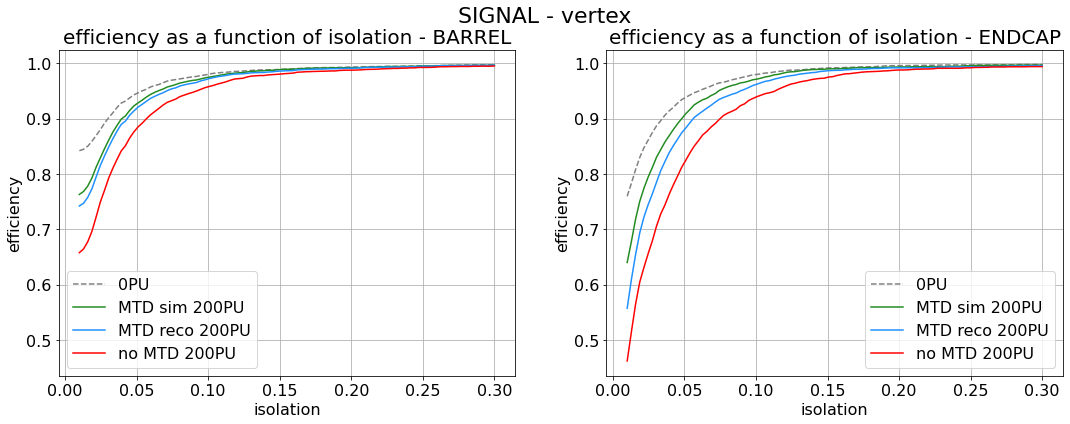

In [46]:
plt.figure(figsize=(18,6))

plt.suptitle("SIGNAL - vertex", fontsize=22)

ax = plt.subplot(121)
plt.title("efficiency as a function of isolation - BARREL")
plt.plot(iso_step, iso_sig_gen_MTD_B, color="grey", label="0PU", linestyle="dashed")
#plt.plot(iso_step, iso_sig_sim_MTD_B, color="forestgreen", label="MTD sim 0PU", linestyle="dashed")
#plt.plot(iso_step, iso_sig_MTD_B, color="dodgerblue", label="MTD reco 0PU", linestyle="dashed")
#plt.plot(iso_step, iso_sig_noMTD_B, color="red", label="no MTD 0PU", linestyle="dashed")

#plt.plot(iso_step, iso_sig_gen_MTD_B_200PU, color="grey", label="gen info 200PU")
plt.plot(iso_step, iso_sig_sim_MTD_B_200PU, color="forestgreen", label="MTD sim 200PU")
plt.plot(iso_step, iso_sig_MTD_B_200PU, color="dodgerblue", label="MTD reco 200PU")
plt.plot(iso_step, iso_sig_noMTD_B_200PU, color="red", label="no MTD 200PU")

plt.xlabel("isolation")
plt.ylabel("efficiency")
plt.grid()
plt.legend()

plt.subplot(122, sharey=ax)
plt.title("efficiency as a function of isolation - ENDCAP")
plt.plot(iso_step, iso_sig_gen_MTD_E, color="grey", label="0PU", linestyle="dashed")
#plt.plot(iso_step, iso_sig_sim_MTD_E, color="forestgreen", label="MTD sim 0PU", linestyle="dashed")
#plt.plot(iso_step, iso_sig_MTD_E, color="dodgerblue", label="MTD reco 0PU", linestyle="dashed")
#plt.plot(iso_step, iso_sig_noMTD_E, color="red", label="no MTD 0PU", linestyle="dashed")

#plt.plot(iso_step, iso_sig_gen_MTD_E_200PU, color="grey", label="gen info 200PU")
plt.plot(iso_step, iso_sig_sim_MTD_E_200PU, color="forestgreen", label="MTD sim 200PU")
plt.plot(iso_step, iso_sig_MTD_E_200PU, color="dodgerblue", label="MTD reco 200PU")
plt.plot(iso_step, iso_sig_noMTD_E_200PU, color="red", label="no MTD 200PU")

plt.xlabel("isolation")
plt.ylabel("efficiency")
plt.grid()
plt.legend()

plt.show()

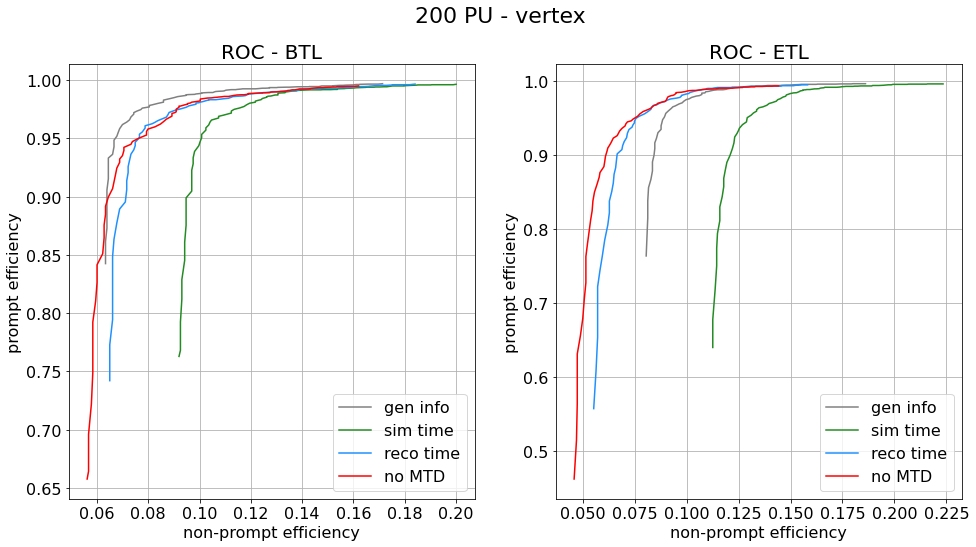

In [47]:
plt.figure(figsize=(16,8))

plt.suptitle("200 PU - vertex", fontsize=22)

plt.subplot(121)
plt.plot(iso_bkg_gen_MTD_B_200PU, iso_sig_gen_MTD_B_200PU, color="grey",        label="gen info")
plt.plot(iso_bkg_sim_MTD_B_200PU, iso_sig_sim_MTD_B_200PU, color="forestgreen", label="sim time")
plt.plot(iso_bkg_MTD_B_200PU,     iso_sig_MTD_B_200PU,     color="dodgerblue",  label="reco time")
plt.plot(iso_bkg_noMTD_B_200PU,   iso_sig_noMTD_B_200PU,   color="red",         label="no MTD")
plt.title("ROC - BTL")
plt.xlabel("non-prompt efficiency")
plt.ylabel("prompt efficiency")
#plt.xlim(0,1)
#plt.ylim(0,1)
#plt.axis("equal")
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(iso_bkg_gen_MTD_E_200PU, iso_sig_gen_MTD_E_200PU, color="grey",        label="gen info")
plt.plot(iso_bkg_sim_MTD_E_200PU, iso_sig_sim_MTD_E_200PU, color="forestgreen", label="sim time")
plt.plot(iso_bkg_MTD_E_200PU,     iso_sig_MTD_E_200PU,     color="dodgerblue",  label="reco time")
plt.plot(iso_bkg_noMTD_E_200PU,   iso_sig_noMTD_E_200PU,   color="red",         label="no MTD")
plt.title("ROC - ETL")
plt.xlabel("non-prompt efficiency")
plt.ylabel("prompt efficiency")
#plt.xlim(0,1)
#plt.ylim(0,1)
#plt.axis("equal")
plt.legend()
plt.grid()
plt.show()